In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from datetime import datetime
from datetime import date

vc fazem ideia de como é nossa comunicação?

In [130]:
def pega_data(linha):
    data = list(linha[:8])
    data.insert(6, '20')
    data = ''.join(data)
    
    if valid_date(data) == True:
        return datetime.strptime(data, '%d/%m/%Y')
    else:
        return None

In [73]:
def valid_date(datestring):
    try:
        datetime.strptime(datestring, '%d/%m/%Y')
        return True
    except:
        return False

In [129]:
for linha in linhas:
    data = list(linha[:8])
    data.insert(6, '20')
    data = ''.join(data)  
    if valid_date(data) == True:
        print data
    #data = ''.join(data)

06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
06/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017
07/07/2017

In [131]:
def pega_nome(linha):
    nome = ''
    for i in linha[18:]:
        if i == ':':
            return nome
        nome += i

In [132]:
def pega_texto(linha):
    linha2 = linha[18:]
    if ':' in linha2:
        return linha2[linha2.index(':') + 1:]
    else:
        return None

In [133]:
def cria_dic(linha):
    dic = {}
    dic['data'] = pega_data(linha)
    dic['nome'] = pega_nome(linha)
    dic['texto']= pega_texto(linha)
    
    return dic
    

In [134]:
def cria_lista_dics(arquivo):
    lista = []
    for linha in arquivo.readlines():
        lista.append(cria_dic(linha))
        
    return lista

In [204]:
arquivo_conectivo = open('Conversa do WhatsApp com Conectivo.txt', 'r')

In [205]:
arquivo_cognitivo = open('Conversa do WhatsApp com Cognitivo.ai.txt', 'r')

In [206]:
lista_dics_conectivo = cria_lista_dics(arquivo_conectivo)

In [207]:
lis_dics_cognitivo = cria_lista_dics(arquivo_cognitivo)

In [212]:
lista = lis_dics_cognitivo + lista_dics_conectivo

In [213]:
lista[0]

{'data': datetime.datetime(2016, 11, 21, 0, 0), 'nome': None, 'texto': None}

In [214]:
lista[-1]

{'data': datetime.datetime(2017, 7, 27, 0, 0),
 'nome': 'Paula Arantes',
 'texto': ' Bom dia! A caminho tamb\xc3\xa9m\n'}

In [215]:
df = pd.DataFrame(lista)

In [216]:
df.head(10)

,data,nome,texto
0,2016-11-21,None,None
1,2015-10-13,None,None
2,2016-11-21,None,None
3,2016-11-21,‪+55 21 99445-8762‬,done\n
4,2016-11-21,Evandro,"Cloves, acho que todo mundo já te conhece\n"
5,2016-11-21,Evandro,Seja bem vindo\n
6,2016-11-21,Camile,Bem vindooo 🎉\n
7,2016-11-21,Cloves Adriano,😃\n
8,2016-11-21,Cloves Adriano,Valeu pessoal\n
9,2016-11-21,‪+55 21 99800-0857‬,Bem vindo!\n


In [217]:
df2 = df.dropna()

In [218]:
df2.head(10)

,data,nome,texto
3,2016-11-21,‪+55 21 99445-8762‬,done\n
4,2016-11-21,Evandro,"Cloves, acho que todo mundo já te conhece\n"
5,2016-11-21,Evandro,Seja bem vindo\n
6,2016-11-21,Camile,Bem vindooo 🎉\n
7,2016-11-21,Cloves Adriano,😃\n
8,2016-11-21,Cloves Adriano,Valeu pessoal\n
9,2016-11-21,‪+55 21 99800-0857‬,Bem vindo!\n
10,2016-11-21,‪+55 21 99445-8762‬,pessoal.. a entrevista de 18 pode ir pra 18:1...
11,2016-11-21,‪+55 21 99445-8762‬,só pra facilitar aqui..\n
12,2016-11-21,Raul Magno,Sim\n


In [219]:
df2.nome.unique()

array(['\xe2\x80\xaa+55 21 99445-8762\xe2\x80\xac', 'Evandro', 'Camile',
       'Cloves Adriano', '\xe2\x80\xaa+55 21 99800-0857\xe2\x80\xac',
       'Raul Magno', '\xe2\x80\xaa+55 21 99835-6904\xe2\x80\xac',
       'Andre Nunes', 'Vinicius Cognitivo. ai', 'Dornelas',
       '\xe2\x80\xaa+55 21 99249-2640\xe2\x80\xac', 'Robson',
       'Paula Arantes'], dtype=object)

In [220]:
df2 = df2[-df2["nome"].isin(["\xe2\x80\xaa+55 21 99445-8762\xe2\x80\xac",
                             "\xe2\x80\xaa+55 21 99800-0857\xe2\x80\xac",
                            "\xe2\x80\xaa+55 21 99835-6904\xe2\x80\xac",
                            "\xe2\x80\xaa+55 21 99249-2640\xe2\x80\xac"])]

In [221]:
df2.head()

,data,nome,texto
4,2016-11-21,Evandro,"Cloves, acho que todo mundo já te conhece\n"
5,2016-11-21,Evandro,Seja bem vindo\n
6,2016-11-21,Camile,Bem vindooo 🎉\n
7,2016-11-21,Cloves Adriano,😃\n
8,2016-11-21,Cloves Adriano,Valeu pessoal\n


In [222]:
len(df2['data'])

5277

In [223]:
df3 = df2[df2['data'] >= date(2017,4,1)]

In [224]:
df3.head()

,data,nome,texto
2656,2017-04-01,Vinicius Cognitivo. ai,Eu uso esse! Muito bom\n
2657,2017-04-01,Vinicius Cognitivo. ai,@5511972571200 @5521998000857 o papo de ontem...
2658,2017-04-01,Cloves Adriano,🎉🎉🎉👏🏻👏🏻👏🏻👏🏻\n
2659,2017-04-02,Vinicius Cognitivo. ai,https://hackernoon.com/index-of-best-ai-machi...
2660,2017-04-03,Raul Magno,Bom dia pessol\n


In [226]:
df3.tail()

,data,nome,texto
6374,2017-07-27,Raul Magno,Bom dia\n
6375,2017-07-27,Raul Magno,Todo mundo Vivo a\n
6376,2017-07-27,Robson,Bom dia... Going to the office...\n
6377,2017-07-27,Raul Magno,Otimo.\n
6378,2017-07-27,Paula Arantes,Bom dia! A caminho também\n


In [225]:
len(df3['data'])

3289

In [280]:
df3.to_csv('whatsapp.csv', sep=';')

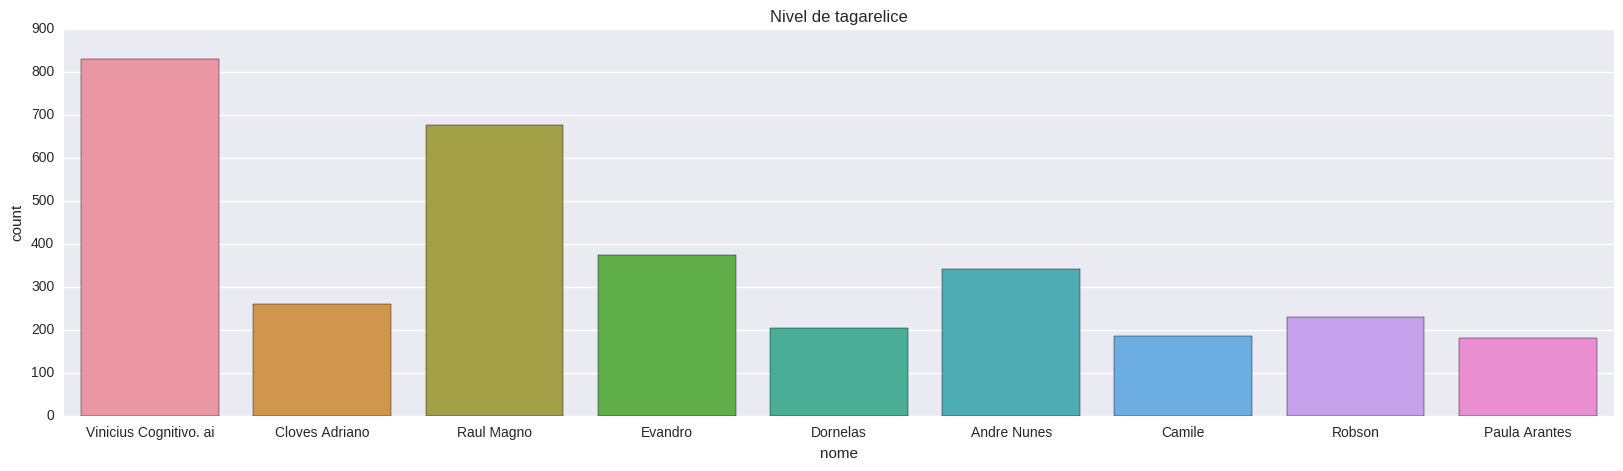

In [228]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 5)
sns.countplot(x='nome', data=df3).set_title('Nivel de tagarelice');

In [229]:
def palavra_no_texto(palavra, texto):
    '''
    Esta função verifica se a 'palavra' 
    existe no texto:
    return --> False se não e True se sim
    '''
    palavra = palavra.lower()
    texto = texto.lower()
    match = re.search(palavra, texto)

    if match:
        return True

    return False


In [230]:
df3['risada'] = [palavra_no_texto('kk', texto) or 
                 palavra_no_texto('haha', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [231]:
df3.head(10)

,data,nome,texto,risada
2656,2017-04-01,Vinicius Cognitivo. ai,Eu uso esse! Muito bom\n,False
2657,2017-04-01,Vinicius Cognitivo. ai,@5511972571200 @5521998000857 o papo de ontem...,False
2658,2017-04-01,Cloves Adriano,🎉🎉🎉👏🏻👏🏻👏🏻👏🏻\n,False
2659,2017-04-02,Vinicius Cognitivo. ai,https://hackernoon.com/index-of-best-ai-machi...,False
2660,2017-04-03,Raul Magno,Bom dia pessol\n,False
2661,2017-04-03,Raul Magno,Pessoal\n,False
2662,2017-04-03,Raul Magno,Daqui a pouco irei para a Empiricus.\n,False
2664,2017-04-03,Evandro,Opa\n,False
2665,2017-04-03,Dornelas,Opa\n,False
2666,2017-04-03,Vinicius Cognitivo. ai,Opa galera quem vai pra wayra hj?\n,False


In [232]:
df_risadas = df3[df3['risada'] == True]

In [233]:
df_risadas.head(3)

,data,nome,texto,risada
2680,2017-04-03,Vinicius Cognitivo. ai,Ahahahhaha\n,True
2688,2017-04-03,Andre Nunes,Theo hahahahahahah\n,True
2698,2017-04-03,Vinicius Cognitivo. ai,Ahahahahahahaha\n,True


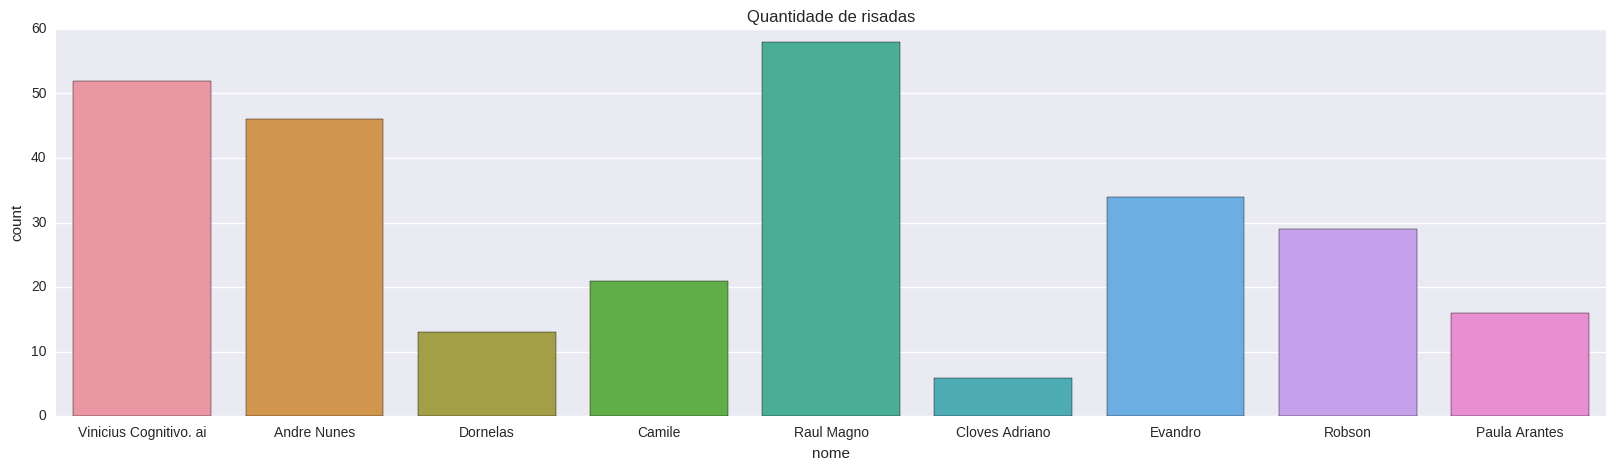

In [234]:
sns.countplot(x='nome', data=df_risadas).set_title('Quantidade de risadas');

In [235]:
def tamanho_da_risada(texto):
    texto = texto.lower()
    if texto.count('k'):
        return texto.count('k')
    if texto.count('ha'):
        return texto.count('ha')
    else:
        None

In [236]:
df_risadas['tamanho_risada'] = [tamanho_da_risada(texto) for texto in df_risadas['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


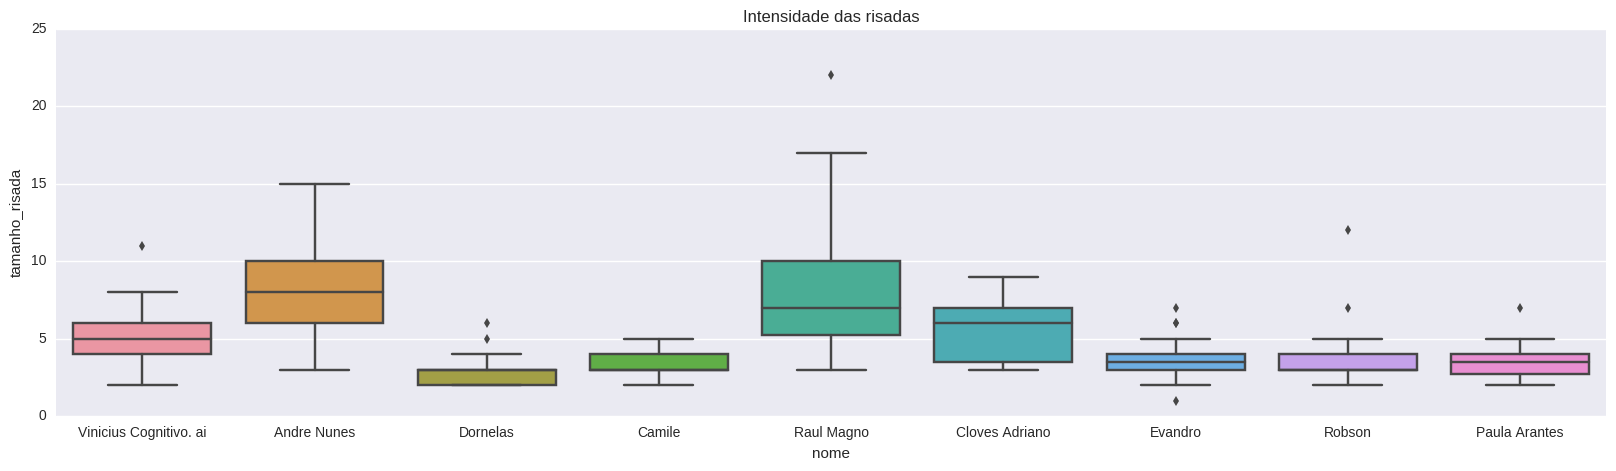

In [237]:
sns.boxplot(x='nome', y='tamanho_risada', data=df_risadas).set_title('Intensidade das risadas');

In [238]:
df3['Midia'] = [palavra_no_texto('<Mídia omitida>\n', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [239]:
df3.head(3)

,data,nome,texto,risada,Midia
2656,2017-04-01,Vinicius Cognitivo. ai,Eu uso esse! Muito bom\n,False,False
2657,2017-04-01,Vinicius Cognitivo. ai,@5511972571200 @5521998000857 o papo de ontem...,False,False
2658,2017-04-01,Cloves Adriano,🎉🎉🎉👏🏻👏🏻👏🏻👏🏻\n,False,False


In [240]:
midia = df3[df3['Midia'] == True]

In [241]:
midia.head(3)

,data,nome,texto,risada,Midia
2716,2017-04-04,Camile,<Mídia omitida>\n,False,True
2726,2017-04-06,Vinicius Cognitivo. ai,<Mídia omitida>\n,False,True
2821,2017-04-08,Raul Magno,<Mídia omitida>\n,False,True


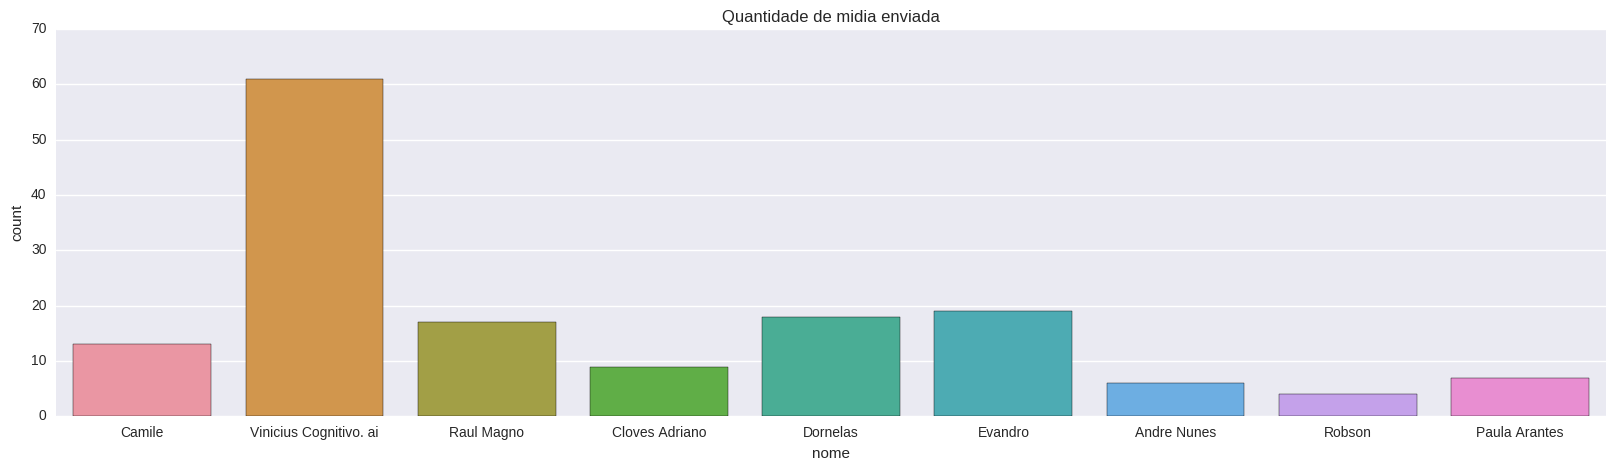

In [242]:
sns.countplot(x='nome', data=midia).set_title('Quantidade de midia enviada');

In [244]:
df3['ruim'] =  [palavra_no_texto('ruim', texto) or 
                palavra_no_texto('mal', texto) or
                palavra_no_texto('bad', texto) or
                palavra_no_texto('triste', texto) or
                palavra_no_texto('infeliz', texto)
                for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [245]:
ruim = df3[df3['ruim'] == True]

In [246]:
ruim.head()

,data,nome,texto,risada,Midia,ruim
2955,2017-04-11,Dornelas,Tudo bem se eu ficar de home hoje? Acho que d...,False,False,True
3108,2017-04-18,Camile,Que bad hahaha estilo visual pós carnaval?\n,True,False,True
3179,2017-04-19,Vinicius Cognitivo. ai,eles foram incubados pelo google na primeira ...,False,False,True
3368,2017-04-27,Camile,"Opa gnt, vou ficar remoto hoje. Minha irma pa...",False,False,True
3473,2017-05-01,Vinicius Cognitivo. ai,Tou mal desde ontem\n,False,False,True


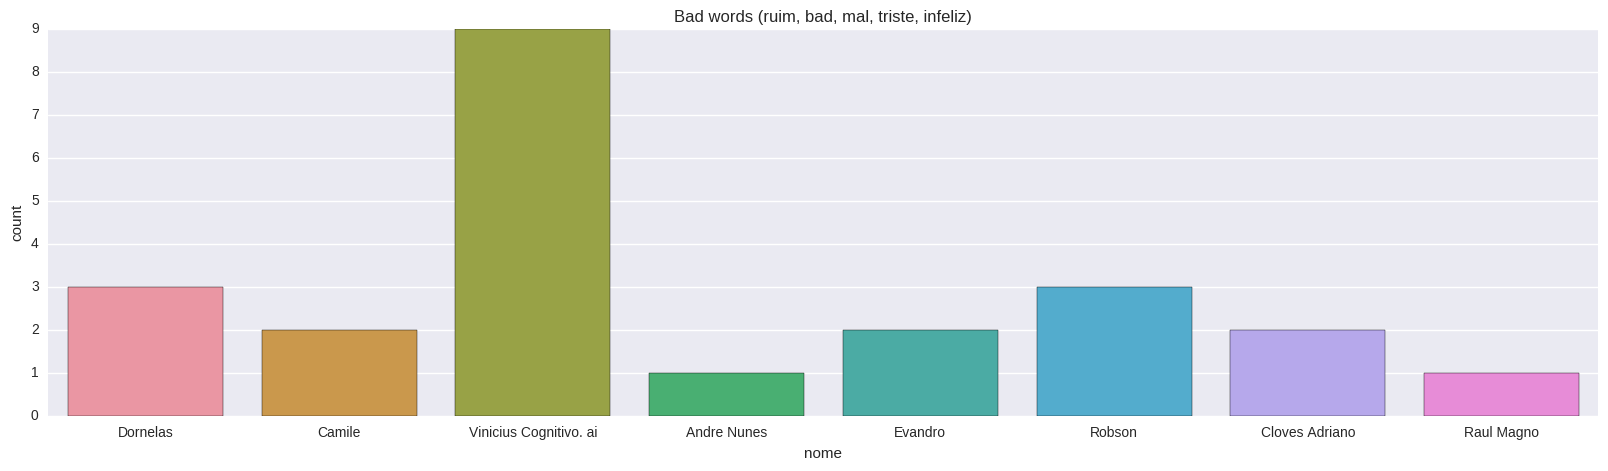

In [247]:
sns.countplot(x='nome', data=ruim).set_title('Bad words (ruim, bad, mal, triste, infeliz)');

In [248]:
ruim2 = df3[(df3['ruim'] == True) & (df3['risada'] == False)]

In [249]:
ruim2.head()

,data,nome,texto,risada,Midia,ruim
2955,2017-04-11,Dornelas,Tudo bem se eu ficar de home hoje? Acho que d...,False,False,True
3179,2017-04-19,Vinicius Cognitivo. ai,eles foram incubados pelo google na primeira ...,False,False,True
3368,2017-04-27,Camile,"Opa gnt, vou ficar remoto hoje. Minha irma pa...",False,False,True
3473,2017-05-01,Vinicius Cognitivo. ai,Tou mal desde ontem\n,False,False,True
3654,2017-05-05,Andre Nunes,Metro ta normal vinicinho?\n,False,False,True


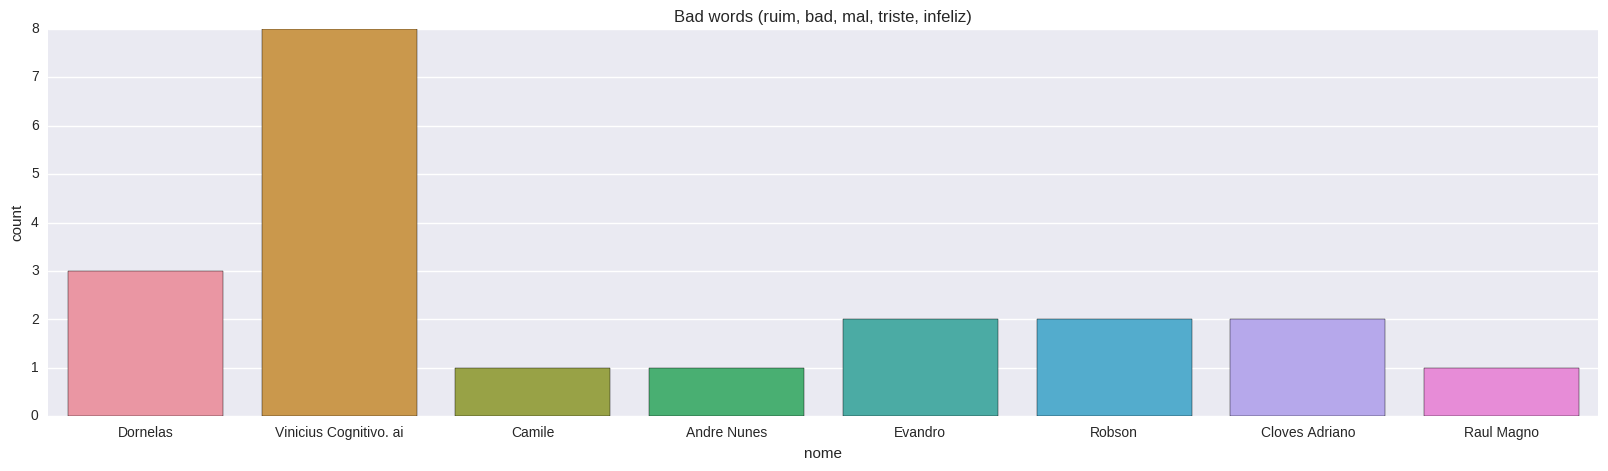

In [250]:
sns.countplot(x='nome', data=ruim2).set_title('Bad words (ruim, bad, mal, triste, infeliz)');

In [251]:
df3['negatividade'] = [palavra_no_texto('não', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [253]:
negatividade = df3[df3['negatividade'] == True]

In [254]:
negatividade.head()

,data,nome,texto,risada,Midia,ruim,negatividade
2687,2017-04-03,Dornelas,"nesse caso não é só marketing, pra isso ele f...",False,False,False,True
2692,2017-04-03,Dornelas,Não poderei aparecer na Daily\n,False,False,False,True
2801,2017-04-07,Vinicius Cognitivo. ai,Tu não precisa ir não dornelinhas! 😂😂😂😂\n,False,False,False,True
2901,2017-04-09,Dornelas,Não querem vir aqui?\n,False,False,False,True
2938,2017-04-09,Raul Magno,Quem não puder me avisa por favor.\n,False,False,False,True


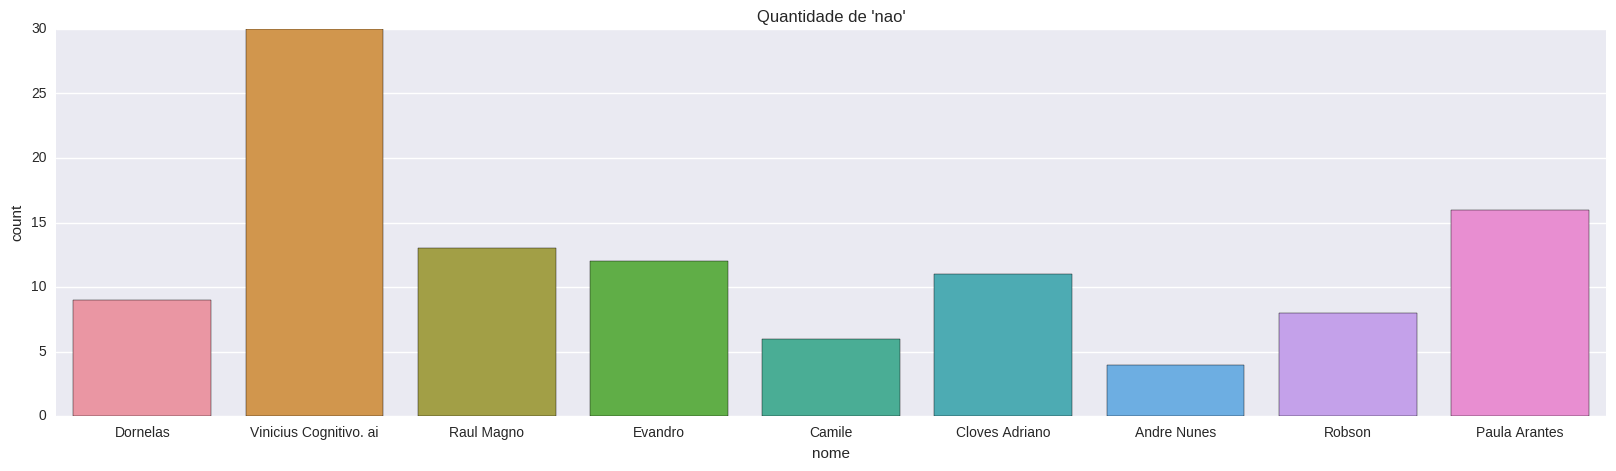

In [255]:
sns.countplot(x='nome', data=negatividade).set_title("Quantidade de 'nao'");

In [256]:
df3['sim'] = [palavra_no_texto('sim', texto) for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [257]:
sim = df3[df3['sim'] == True]

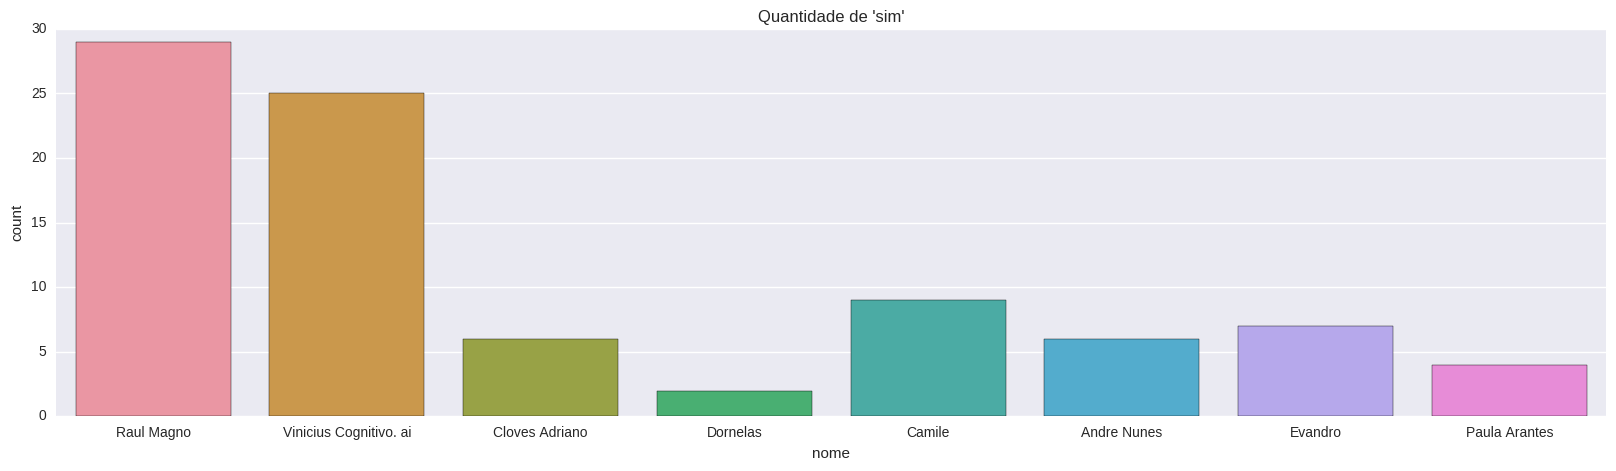

In [258]:
sns.countplot(x='nome', data=sim).set_title("Quantidade de 'sim'");

In [259]:
df3['positividade'] = [palavra_no_texto('boa', texto) or
                      palavra_no_texto('legal', texto) or
                      palavra_no_texto('feliz', texto) or
                      palavra_no_texto('alegre', texto) or
                      palavra_no_texto('contente', texto) or
                      palavra_no_texto('alegria', texto) or
                      palavra_no_texto('felicidade', texto) or
                      palavra_no_texto('bem', texto)  for texto in df3['texto']]

/home/cloves/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [260]:
positividade = df3[df3['positividade'] == True]

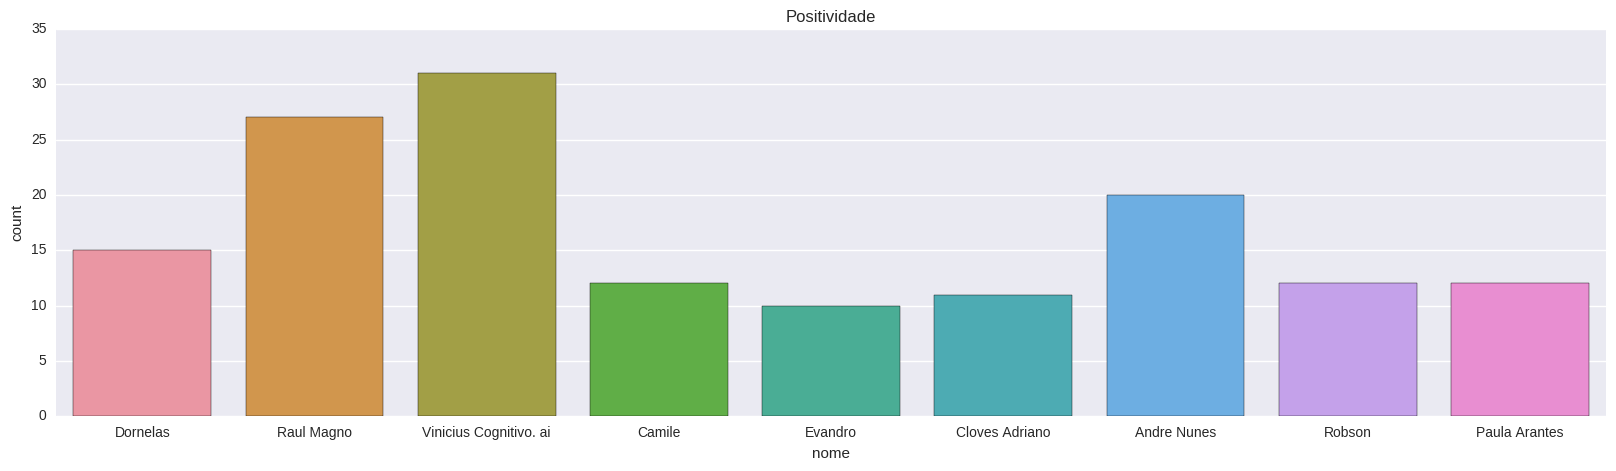

In [261]:
sns.countplot(x='nome', data=positividade).set_title("Positividade");

In [276]:
df2['viajante'] = [palavra_no_texto('viagem', texto) or
                  palavra_no_texto('viajando', texto) or
                  palavra_no_texto('viajar', texto) or
                  palavra_no_texto('viajarei', texto) or
                  palavra_no_texto('pro rio', texto) or
                  palavra_no_texto('para o rio', texto) or
                  palavra_no_texto('pra portugal', texto) or
                  palavra_no_texto('para portugal', texto) or
                  palavra_no_texto('avião', texto) for texto in df2['texto']]

In [277]:
viajante = df2[df2['viajante'] == True]

In [278]:
viajante

,data,nome,texto,ruim,viajante
592,2016-12-20,Andre Nunes,Vou pro rio entao\n,False,True
1330,2017-02-03,Evandro,To no avião já galera\n,False,True
1332,2017-02-03,Raul Magno,Boa viagem\n,False,True
1336,2017-02-03,Andre Nunes,Avião? 😱\n,False,True
1338,2017-02-03,Raul Magno,Eu estou indo para o Rio agora...\n,False,True
2168,2017-03-16,Raul Magno,"Pessoal, irei para o Rio amanha. Vou trabalha...",False,True
2611,2017-03-30,Raul Magno,Boa viagem\n,False,True
3874,2017-05-12,Raul Magno,Estou indo para o Rio agora.\n,False,True
4666,2017-06-15,Vinicius Cognitivo. ai,Menos a camile que tá viajando\n,False,True
4927,2017-06-26,Robson,"Estou em BH, vou viajar daqui a apouco e a ta...",False,True


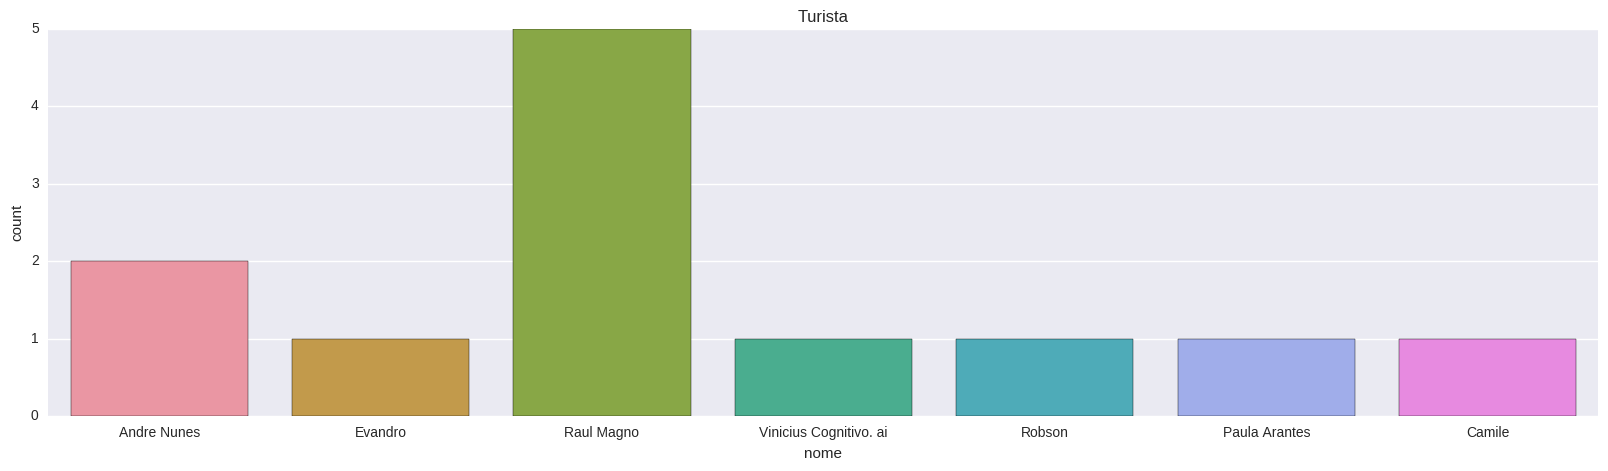

In [279]:
sns.countplot(x='nome', data=viajante).set_title("Turista");

# Diagrama de Cordas